## LBVAR Adaptive

In [1]:
import bok_da
import pandas as pd

In [2]:
# large 데이터 로드
# df = pd.read_excel("data/Differed_Data.xlsx", index_col=0) ##
df = pd.read_excel("../data/Differed_Data_Selected.xlsx", index_col=0) ##

# 일부 컬럼만 사용 (138개 중)
col_limit = 10
df = df.iloc[:, :col_limit]

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2000-03-01 to 2023-12-01
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nominal_GDP          96 non-null     float64
 1   Total_Save           96 non-null     float64
 2   Household_Spending   96 non-null     float64
 3   Government_Spending  96 non-null     float64
 4   Foreign_Store        96 non-null     float64
 5   GDP_Deflator         96 non-null     float64
 6   Dollor_Won           96 non-null     float64
 7   Call                 96 non-null     float64
 8   Treasury_Bond        96 non-null     float64
 9   PPI                  96 non-null     float64
dtypes: float64(10)
memory usage: 8.2 KB


,Nominal_GDP,Total_Save,Household_Spending,Government_Spending,Foreign_Store,GDP_Deflator,Dollor_Won,Call,Treasury_Bond,PPI
Time,,,,,,,,,,
2000-03-01,15.364291,14.268692,15.159773,13.792548,59.403704,4.271157,7.007678,4.981847,8.939529,4.331653
2000-06-01,15.379320,14.304766,15.162181,13.823710,62.638977,4.271062,7.010601,5.036268,8.740849,4.326303
2000-09-01,15.402900,14.328262,15.162124,13.911984,63.234487,4.279456,7.033930,5.127937,8.204702,4.331350
2000-12-01,15.390514,14.292919,15.149745,13.830700,66.431507,4.291200,7.066415,5.356287,7.313966,4.336247
2001-03-01,15.405731,14.300737,15.171157,13.872958,69.774888,4.303751,7.131962,5.167332,5.635832,4.331585


In [3]:
from bok_da.ts.lbvar import LBVAR_Adaptive

model = LBVAR_Adaptive(p=4, ndraws=10000, burnin=1000, verbose=True)

> Initializing Model...
  - Trend: 1
  - p(lag): 4
  - Number of Draws: 10000
  - Burn-in: 1000
  - Verbose: True


In [4]:
model.fit(df)

> Prior Making (Adaptive)
> Posterior Draw (Adaptive)


100%|██████████| 11000/11000 [10:49<00:00, 16.94it/s]


In [5]:
model.Draw.variable_summary()

added | variable | type    |   size(KB) | info
---------------------------------------------------
    1 | theta_i | list    |      0.180 | length=10
    2 | h_i     | list    |      0.180 | length=10
    3 | psi_i   | list    |      0.180 | length=10
    4 | u       | list    |      0.180 | length=10
    5 | kappa_1 | ndarray |      0.109 | shape=(10000,)
    6 | kappa_2 | ndarray |      0.109 | shape=(10000,)
    7 | nu_p    | ndarray |      0.109 | shape=(10000,)
    8 | h_0     | ndarray |      0.125 | shape=(10, 10000)
    9 | sigma_h | ndarray |      0.125 | shape=(10, 10000)


In [6]:
forecast_results = model.forecast(forecast_period=4)

# 예측 결과 확인
print(forecast_results.Mean)

> Forecast Start
> Reduced Transform


100%|██████████| 10000/10000 [00:01<00:00, 5586.27it/s]


> Forecasting


100%|██████████| 10000/10000 [00:00<00:00, 15068.67it/s]

> Done
[[ 16.09186535  15.0162753   15.77883558  14.85366603  98.26195582
    4.73505014   7.21609863   3.33638625   3.40280204   4.77338335]
 [ 16.09303198  15.01874981  15.77970145  14.86843445  99.03777512
    4.73841841   7.23850054   3.06617686   3.21429819   4.77679387]
 [ 16.09492232  15.02221838  15.7810914   14.88140319 100.20262812
    4.74268128   7.26151044   2.77614967   3.04739751   4.77860498]
 [ 16.09735307  15.02591511  15.78316405  14.88960306 101.21744595
    4.74667791   7.27852198   2.49290465   2.89670099   4.77962472]]


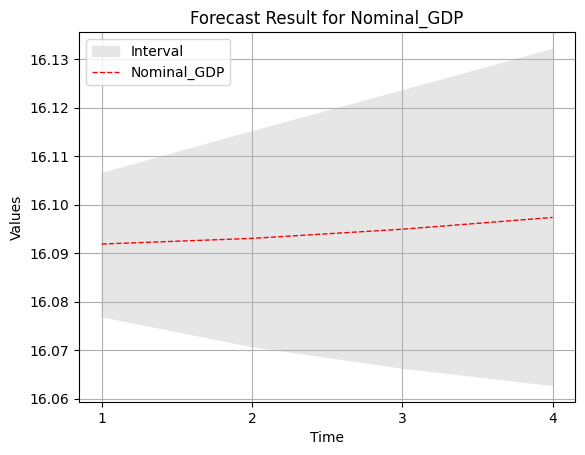

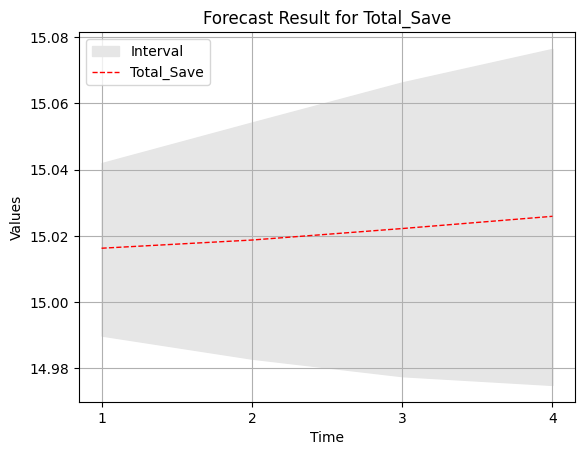

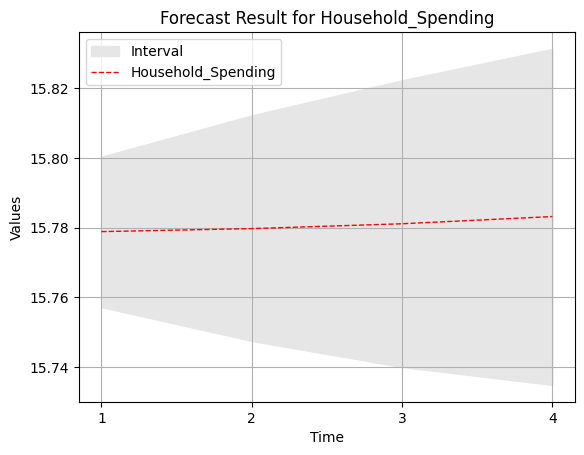

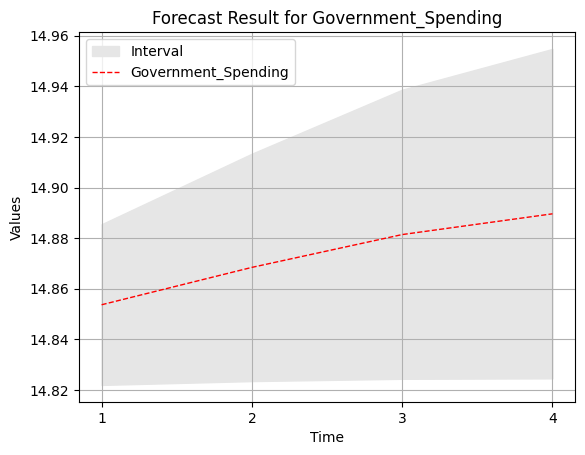

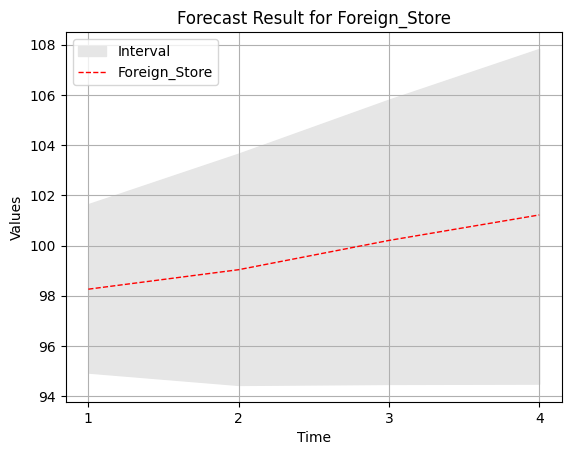

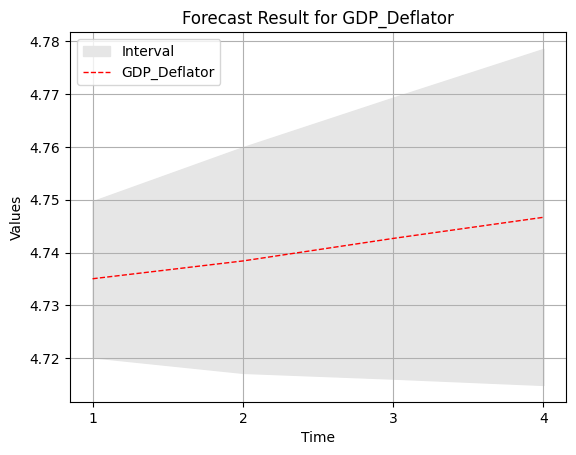

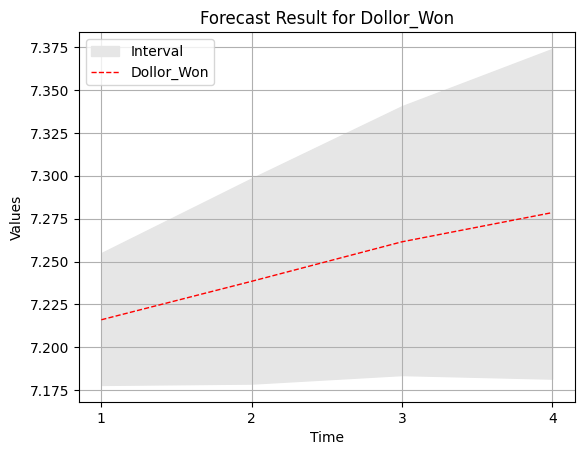

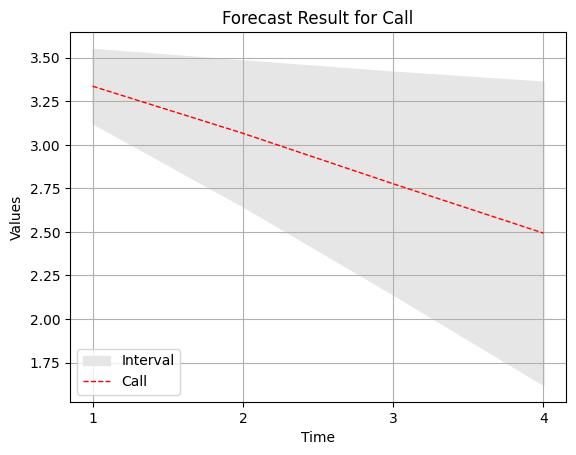

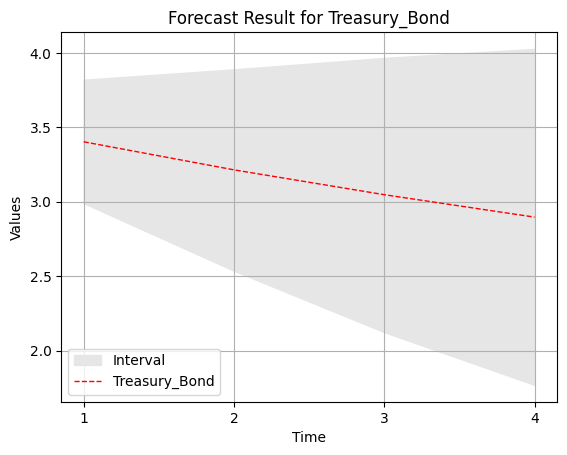

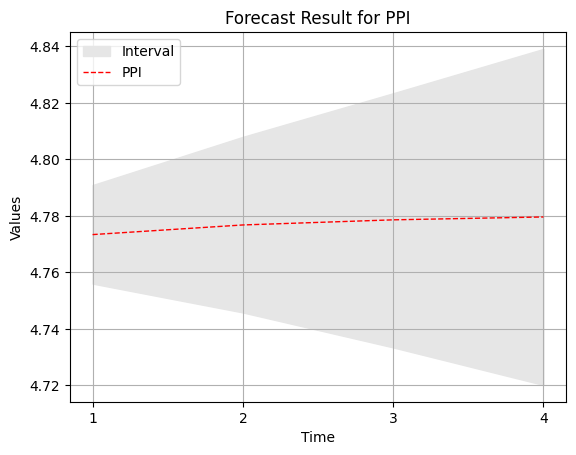

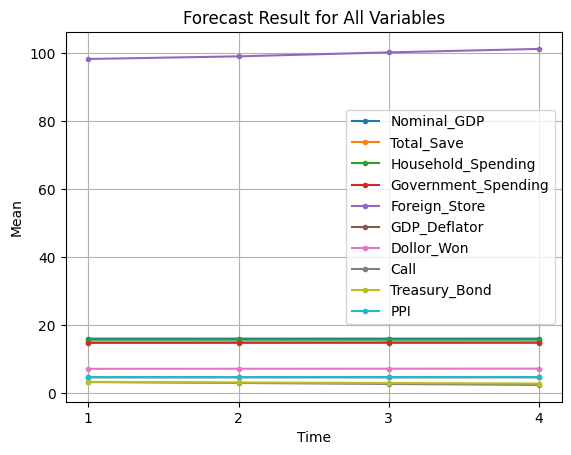

In [7]:
model.print_forecast(column_names=df.columns)